In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_returns_df(path):
    
    # Read in stock price data, get shape
    stock_price_df = pd.read_csv(path)
    t = np.shape(stock_price_df)[0]-1
    n = np.shape(stock_price_df)[1]-1

    # Build returns matrix
    stock_price = stock_price_df.values[:,1:]
    X = np.ndarray(shape=(t,n))
    for i in range(t):
        for j in range(n):
            X[i,j] = (stock_price[i,j]/stock_price[i+1,j])-1

    # Get mean vector and covariance matrix 
    X_df = pd.DataFrame(X)
    
    return X_df

In [3]:
def portfolio_stats(m,C,w):
    r_p = np.dot(w,m)
    v_p = (w@C@w)**0.5
    return np.array([r_p,v_p])

def min_var_portfolio(m,C,r):
    e = np.ones(len(m))
    C_inv = np.linalg.inv(C)
    q_ee = e@C_inv@e
    q_em = e@C_inv@m
    q_me = m@C_inv@e
    q_mm = m@C_inv@m
    lambda_1 = (q_mm-q_me*r)/(q_ee*q_mm-q_em*q_me)
    lambda_2 = (q_ee*r-q_em)/(q_ee*q_mm-q_em*q_me)
    return C_inv@(lambda_1*e+lambda_2*m)

def global_min_var_portfolio(m,C):
    e = np.ones(len(m))
    C_inv = np.linalg.inv(C)
    q_ee = e@C_inv@e
    q_em = e@C_inv@m
    q_me = m@C_inv@e
    q_mm = m@C_inv@m
    r_star = q_em/q_ee
    return min_var_portfolio(m,C,r_star)

In [4]:
def diversification_gains(k_grid,df,r,n=100,n_samp=1000):
    v_grid = np.zeros(len(k_grid))
    for i in range(len(k_grid)):
        k = int(k_grid[i])
        for j in range(n_samp):
            selected = np.random.choice(np.arange(n),k,replace=False)
            selected_df = df[selected]
            m = selected_df.mean().values
            v = (selected_df.var().values)**0.5
            C = selected_df.cov().values
            w = min_var_portfolio(m,C,r)
            v_grid[i] = v_grid[i]+portfolio_stats(m,C,w)[1]/n_samp
    return v_grid

In [5]:
np.random.seed(0)
k_grid = np.linspace(5,95,19)
US_df = get_returns_df(r"C:\Users\zhubr\Desktop\ECON 251\stock-price-data\sp500-t100-10y.csv")
JP_df = get_returns_df(r"C:\Users\zhubr\Desktop\ECON 251\stock-price-data\nk225-t100-10y.csv")

In [6]:
v_grid_US_1 = diversification_gains(k_grid,US_df,0.01)
v_grid_US_2 = diversification_gains(k_grid,US_df,0.02)
v_grid_US_3 = diversification_gains(k_grid,US_df,0.03)
v_grid_US_4 = diversification_gains(k_grid,US_df,0.04)

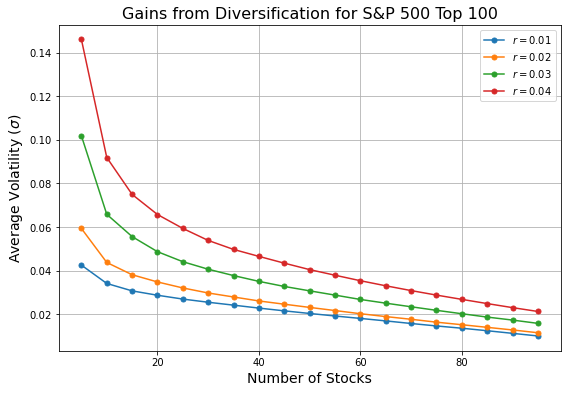

In [7]:
plt.figure(figsize=(9,6))
plt.plot(k_grid,v_grid_US_1,marker='.',ms=10,label="$r=0.01$")
plt.plot(k_grid,v_grid_US_2,marker='.',ms=10,label="$r=0.02$")
plt.plot(k_grid,v_grid_US_3,marker='.',ms=10,label="$r=0.03$")
plt.plot(k_grid,v_grid_US_4,marker='.',ms=10,label="$r=0.04$")
plt.title("Gains from Diversification for S&P 500 Top 100",size=16)
plt.xlabel("Number of Stocks",size=14)
plt.ylabel("Average Volatility ($\sigma$)",size=14)
plt.grid()
plt.legend()
plt.savefig(r"C:\Users\zhubr\Desktop\ECON 251\figures\sp500-gd.png")
plt.show()

In [8]:
v_grid_JP_1 = diversification_gains(k_grid,JP_df,0.01)
v_grid_JP_2 = diversification_gains(k_grid,JP_df,0.02)
v_grid_JP_3 = diversification_gains(k_grid,JP_df,0.03)
v_grid_JP_4 = diversification_gains(k_grid,JP_df,0.04)

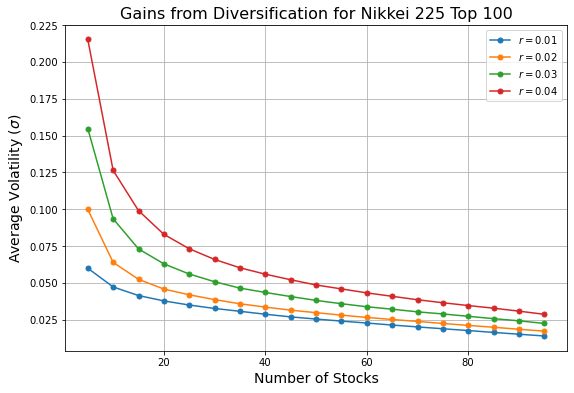

In [9]:
plt.figure(figsize=(9,6))
plt.plot(k_grid,v_grid_JP_1,marker='.',ms=10,label="$r=0.01$")
plt.plot(k_grid,v_grid_JP_2,marker='.',ms=10,label="$r=0.02$")
plt.plot(k_grid,v_grid_JP_3,marker='.',ms=10,label="$r=0.03$")
plt.plot(k_grid,v_grid_JP_4,marker='.',ms=10,label="$r=0.04$")
plt.title("Gains from Diversification for Nikkei 225 Top 100",size=16)
plt.xlabel("Number of Stocks",size=14)
plt.ylabel("Average Volatility ($\sigma$)",size=14)
plt.grid()
plt.legend()
plt.savefig(r"C:\Users\zhubr\Desktop\ECON 251\figures\nk225-gd.png")
plt.show()

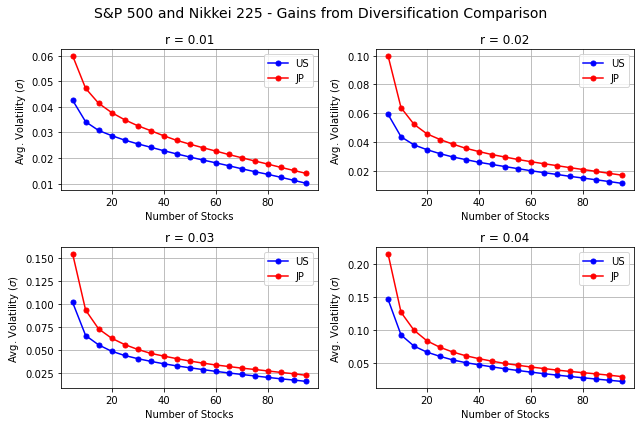

In [10]:
plt.figure(figsize=(9,6))

plt.subplot(2,2,1)
plt.plot(k_grid,v_grid_US_1,c='b',marker='.',ms=10,label="US")
plt.plot(k_grid,v_grid_JP_1,c='r',marker='.',ms=10,label="JP")
plt.title("r = 0.01")
plt.xlabel("Number of Stocks")
plt.ylabel("Avg. Volatility $(\sigma)$")
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(k_grid,v_grid_US_2,c='b',marker='.',ms=10,label="US")
plt.plot(k_grid,v_grid_JP_2,c='r',marker='.',ms=10,label="JP")
plt.title("r = 0.02")
plt.xlabel("Number of Stocks")
plt.ylabel("Avg. Volatility $(\sigma)$")
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(k_grid,v_grid_US_3,c='b',marker='.',ms=10,label="US")
plt.plot(k_grid,v_grid_JP_3,c='r',marker='.',ms=10,label="JP")
plt.title("r = 0.03")
plt.xlabel("Number of Stocks")
plt.ylabel("Avg. Volatility $(\sigma)$")
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.plot(k_grid,v_grid_US_4,c='b',marker='.',ms=10,label="US")
plt.plot(k_grid,v_grid_JP_4,c='r',marker='.',ms=10,label="JP")
plt.title("r = 0.04")
plt.xlabel("Number of Stocks")
plt.ylabel("Avg. Volatility $(\sigma)$")
plt.legend()
plt.grid()

plt.suptitle("S&P 500 and Nikkei 225 - Gains from Diversification Comparison",size=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig(r"C:\Users\zhubr\Desktop\ECON 251\figures\gd-comp.png")
plt.show()